In [1]:
import pandas as pd
df=pd.DataFrame()

In [44]:
df = pd.read_csv("Dummy_Vol.csv",index_col='DATE')

In [45]:
df.head

<bound method NDFrame.head of             Volume
DATE              
01-05-2023  210321
08-05-2023  210441
15-05-2023  201111
22-05-2023  220022
29-05-2023  210202
05-06-2023  210947
12-06-2023  212640
19-06-2023  213249
26-06-2023  213858
03-07-2023  214468
10-07-2023  215077
17-07-2023  215686
24-07-2023  216295
31-07-2023  216905
07-08-2023  217514
14-08-2023  218123>

In [46]:
df.tail()

,Volume
DATE,
17-07-2023,215686
24-07-2023,216295
31-07-2023,216905
07-08-2023,217514
14-08-2023,218123


<AxesSubplot:xlabel='DATE'>

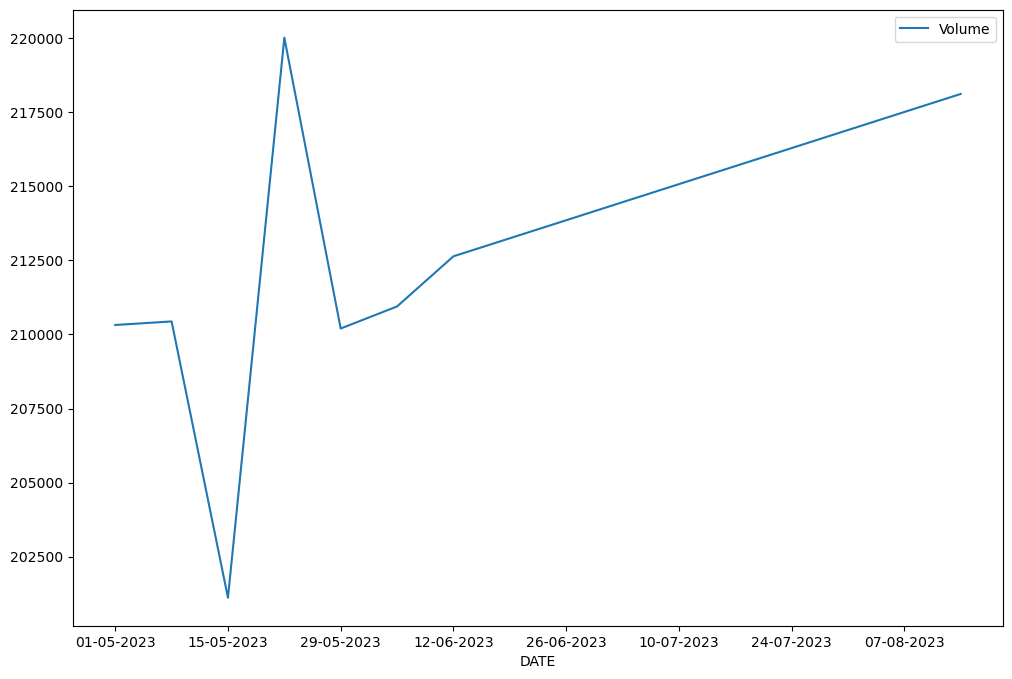

In [47]:
df.columns = ['Volume']
df.plot(figsize=(12,8))

In [48]:
df['Vol_LastMonth']=df['Volume'].shift(+1)
df['Vol_2Monthsback']=df['Volume'].shift(+2)
df['Vol_3Monthsback']=df['Volume'].shift(+3)
df

,Volume,Vol_LastMonth,Vol_2Monthsback,Vol_3Monthsback
DATE,,,,
01-05-2023,210321,NaN,NaN,NaN
08-05-2023,210441,210321.0,NaN,NaN
15-05-2023,201111,210441.0,210321.0,NaN
22-05-2023,220022,201111.0,210441.0,210321.0
29-05-2023,210202,220022.0,201111.0,210441.0
05-06-2023,210947,210202.0,220022.0,201111.0
12-06-2023,212640,210947.0,210202.0,220022.0
19-06-2023,213249,212640.0,210947.0,210202.0
26-06-2023,213858,213249.0,212640.0,210947.0


In [49]:
df=df.dropna()
df

,Volume,Vol_LastMonth,Vol_2Monthsback,Vol_3Monthsback
DATE,,,,
22-05-2023,220022,201111.0,210441.0,210321.0
29-05-2023,210202,220022.0,201111.0,210441.0
05-06-2023,210947,210202.0,220022.0,201111.0
12-06-2023,212640,210947.0,210202.0,220022.0
19-06-2023,213249,212640.0,210947.0,210202.0
26-06-2023,213858,213249.0,212640.0,210947.0
03-07-2023,214468,213858.0,213249.0,212640.0
10-07-2023,215077,214468.0,213858.0,213249.0
17-07-2023,215686,215077.0,214468.0,213858.0


In [50]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [51]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)

In [52]:
import numpy as np
x1,x2,x3,y=df['Vol_LastMonth'],df['Vol_2Monthsback'],df['Vol_3Monthsback'],df['Volume']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)

In [53]:
final_x

array([[201111., 210441., 210321.],
       [220022., 201111., 210441.],
       [210202., 220022., 201111.],
       [210947., 210202., 220022.],
       [212640., 210947., 210202.],
       [213249., 212640., 210947.],
       [213858., 213249., 212640.],
       [214468., 213858., 213249.],
       [215077., 214468., 213858.],
       [215686., 215077., 214468.],
       [216295., 215686., 215077.],
       [216905., 216295., 215686.],
       [217514., 216905., 216295.]])

In [54]:
X_train,X_test,y_train,y_test=final_x[:-10],final_x[-10:],y[:-10],y[-10:]

In [55]:
model.fit(X_train,y_train)
lin_model.fit(X_train,y_train)

C:\Users\inkdb\AppData\Local\Temp\ipykernel_11084\1977262272.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


LinearRegression()

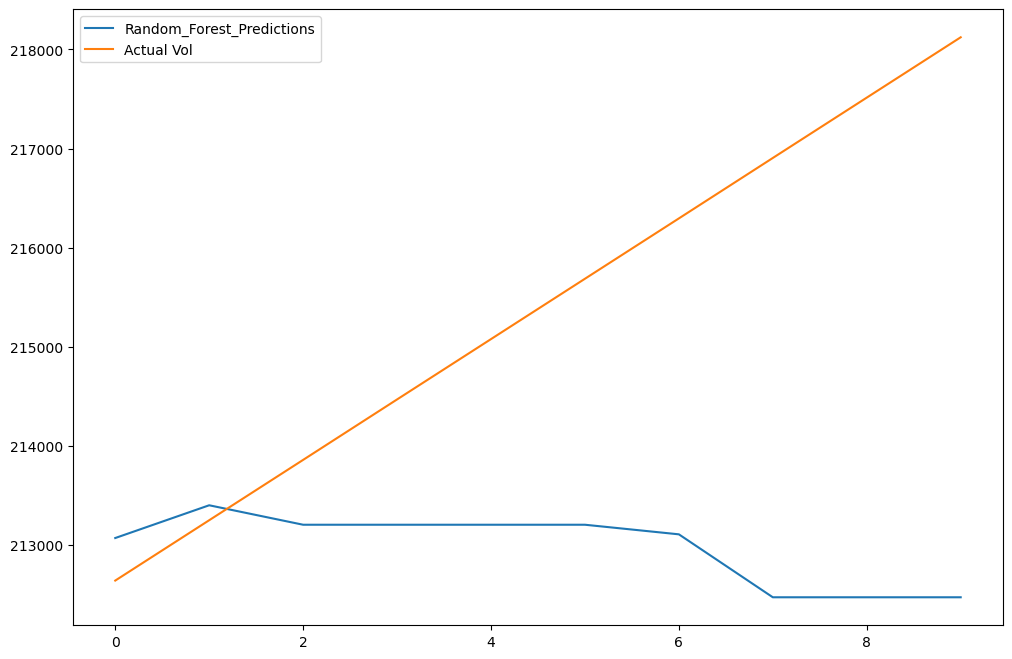

In [56]:
pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual Vol')
plt.legend(loc="upper left")

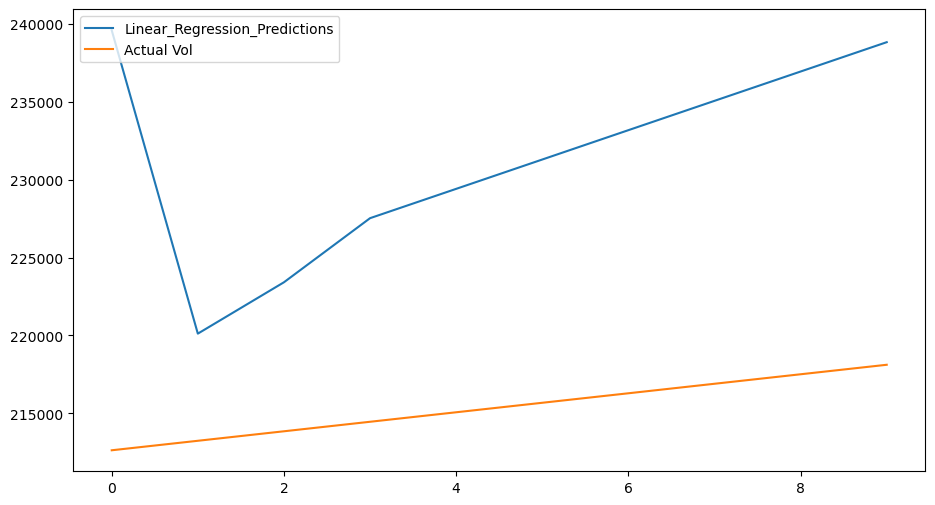

In [57]:
lin_pred=lin_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual Vol')
plt.legend(loc="upper left")

In [58]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_rf=sqrt(mean_squared_error(pred,y_test))
rmse_lr=sqrt(mean_squared_error(lin_pred,y_test))

In [59]:
print('Mean Squared Error for Random Forest Model is:',rmse_rf)
print('Mean Squared Error for Linear Regression Model is:',rmse_lr)

Mean Squared Error for Random Forest Model is: 3147.946554700377
Mean Squared Error for Linear Regression Model is: 17032.95111884025
